In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ageandheight.csv',index_col=0)

data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [41]:
Age  = data.loc[:].Age.to_numpy()
Height = data.loc[:].Height.to_numpy()
Age,Height

(array([14.76787382,  3.10767135,  7.26691701,  1.81517968, 16.75375763,
         5.35126307,  8.65571488,  4.20599293,  7.35669106,  1.66817819,
         8.2969588 , 14.74948482, 15.28545214, -0.16353169, 16.65534197,
         0.85918789,  8.43332999, 11.92386163,  0.76828323, 11.36202254,
        -0.68301696,  1.29597926, 10.31206094, 17.39335272, 10.31003056,
        -0.14639168,  6.23764582, 15.55153122,  2.77346425, 15.59798962,
        -0.78085287,  7.57789784,  2.04165705,  9.90665221,  2.87252515,
         1.54231936, -0.08795844,  5.46202264, 15.04362695,  5.99372597,
         4.805291  ,  8.94992003,  5.02020985,  9.89555258,  5.20281507,
         0.19568558,  0.89217393,  7.30979593, 10.8545723 , 15.69876495,
         0.81216582, 15.40144747,  9.21599924,  8.98515379,  3.74369906,
         0.75192511,  6.5963469 ,  9.75112683,  7.40094567, -0.5484884 ,
        17.32712575, 10.53406938, 15.16816596,  9.46971876, 13.54691548,
         7.80132294,  2.51910344,  4.71666526, 10.0

In [47]:
def plotting(x,y,b0,b1):
  plt.scatter(x,y)
  plt.xlabel('Age')
  plt.ylabel('Height')
  y_cap = b0 + b1*x
  plt.plot(x,y_cap,color='red')

In [48]:
def loss_function(b0,b1,x,y):
  y_cap = b0 + b1 * x
  return np.mean((y_cap-y)**2)

4.672583849579185

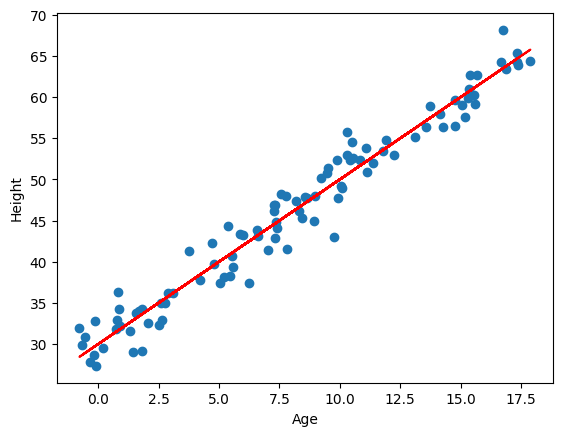

In [49]:
plotting(Age,Height,30,2)
loss_function(30,2,Age,Height)

In [50]:
def gradient_descent(x,y, b0,b1,learning_rate=0.01):
  b0_gradient,b1_gradient,n = 0,0,len(Age)
  y_cap = b0 + b1*x
  b1_gradient =np.sum( (-(2/n)) * x * (y - y_cap) )
  # print(f"printing b0_gradient{np.sum(-((2/n)*x)/(y-y_cap))}")
  b0_gradient = np.sum( (-(2/n))  * (y - y_cap) )
  # print(f"printing b0_gradient{np.sum(-((2/n))/(y-y_cap))}")
  b0 -=  learning_rate * b0_gradient
  b1 -=  learning_rate * b1_gradient
  return b0,b1

b0 and b1 13.981362654514466 3.396986969439303
loss at 100 is 84.65739779661452


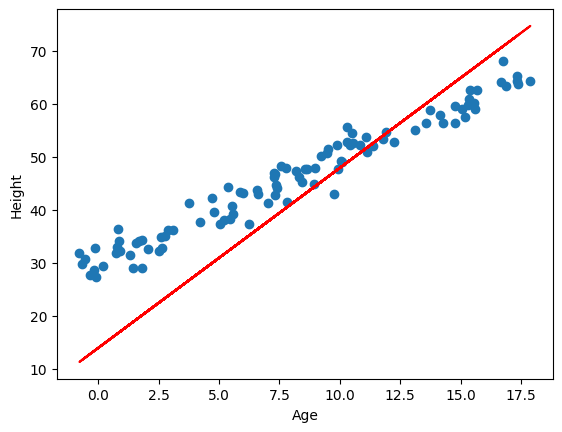

In [ ]:

b0 = 0
b1 = 0
loss_list = []
for i in range(1000):
  loss_list.append(loss_function(b0,b1,Age,Height))
  b0 ,b1 = gradient_descent(Age,Height,b0,b1,0.01)
  if ((i+1) % 100 == 0):
    print('b0 and b1', b0, b1)
    print(f'loss at {i+1} is {loss_function(b0,b1,Age,Height)}')
    plotting(Age,Height,b0,b1)
    plt.show()



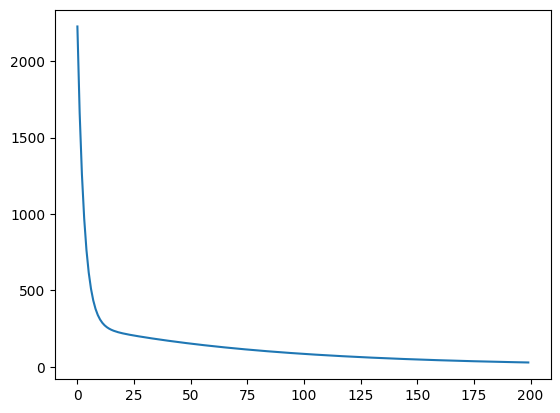

In [55]:
plt.plot(loss_list)